## Project Title :  

## 0. Dependencies 

Data Folder:
Data/tweet.txt
Data/tweet_x.csv

Libraries:
sklearn
scipy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


from Definations import *
from Utilities import *
from sklearn.feature_selection.univariate_selection import SelectPercentile
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.manifold import isomap
import numpy as np
from scipy.sparse import hstack



# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the

## 1. Dataset Exploration

### Step 1: Benchmark Experiment Replication using ASTD. ###

1. It stands for Arabic Sentemental Tweet Dataset which is used for arabic social sentimental analysis .
2. Consist of 10000 tweets gathered from twitter.
3. Each tweet is Classified as: objective, subjective positive, subjective negative or subjective mixed.

### Step 2: Loading the data set in jupyter for exploration. ###

In [2]:
# Import libraries necessary for this project
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

In [3]:
!pip install wordcloud

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [4]:
import nltk
import arabic_reshaper
from bidi.algorithm import get_display
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

##### Text File

In [6]:
import codecs
filename = codecs.open('data\Tweets.txt', 'r', encoding="utf-8")
outputfile = filename.readlines()
for line in outputfile[0:5]:
    print(line)

بعد استقالة رئيس #المحكمة_الدستورية ننتظر استقالة #رئيس_القضاء #السودان	OBJ

أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر، بمناسبة صدور أولى روايته	POS

البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام العريان الي واشنطن شئ مقرف	NEG

#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية أول فيلم استقصائي يتناول أسرار و كواليس تعرض لأول مرة حول حقيقة	OBJ

الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقولها ملل الله وكيلك تعطيني محاضرة عن الفسق والفجور بجنوب الشيشان #ليه كذا يانبع الحنان	NEUTRAL



##### CSV File

In [7]:
df = pd.read_csv('data\Tweets_x.csv', delimiter='\t',names= ["Tweet", "Classification"])

df.head()

,Tweet,Classification
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,POS
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,NEG
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,NEUTRAL


In [8]:
df.describe()

,Tweet,Classification
count,10006,9986
unique,10002,4
top,يوسف الحسيني بالفيديو يفضح كذب قناة الجزيرة وي...,OBJ
freq,2,6675


AS it can be clearly seen, I lost some data in this process since i converted the txt into csv using excel. I removed them to keep dataset consistant but I will fix this issue later

#### Show Count of All Categories ####

In [9]:
df = df.dropna()

In [10]:
df.describe()

,Tweet,Classification
count,9986,9986
unique,9982,4
top,الإخوان يطلقون طفايات الحريق للإيحاء بإلقاء ال...,OBJ
freq,2,6675


In [11]:
# Split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    df['Tweet'], df['Classification'], test_size=0.5)


# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Tweet'])
print(X_train_counts.shape)

#return how many word has occured in a document
print(count_vect.vocabulary_.get(u'الحرية'))

(9986, 37515)
6281


In [12]:
# print(count_vect.vocabulary_)
keys = np.array(list(count_vect.vocabulary_.keys()))
values = np.array(list(count_vect.vocabulary_.values()))

words_tokenized = pd.DataFrame(values,columns=['frequency'],index=keys) 
words_tokenized.head()

,frequency
دراما,17941
استنتاجات,3519
الغربة,8174
إفساد,2405
شيفنا,20447


### Exploraing tweet contints

In [13]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

In [ ]:

stop_words = set(stopwords.words('arabic')) 
  
word_tokens = count_vect.vocabulary_.keys()
  
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
  
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 

print(len(word_tokens) )
print(len(filtered_sentence ) )

** Word Frequncy Visualization using wordcloud **

In [15]:
entries = []
for w in word_tokens:
    reshaped_text = arabic_reshaper.reshape(w)
    bidi_text = get_display(reshaped_text)
    entries.append([bidi_text ,count_vect.vocabulary_.get(w) ] )

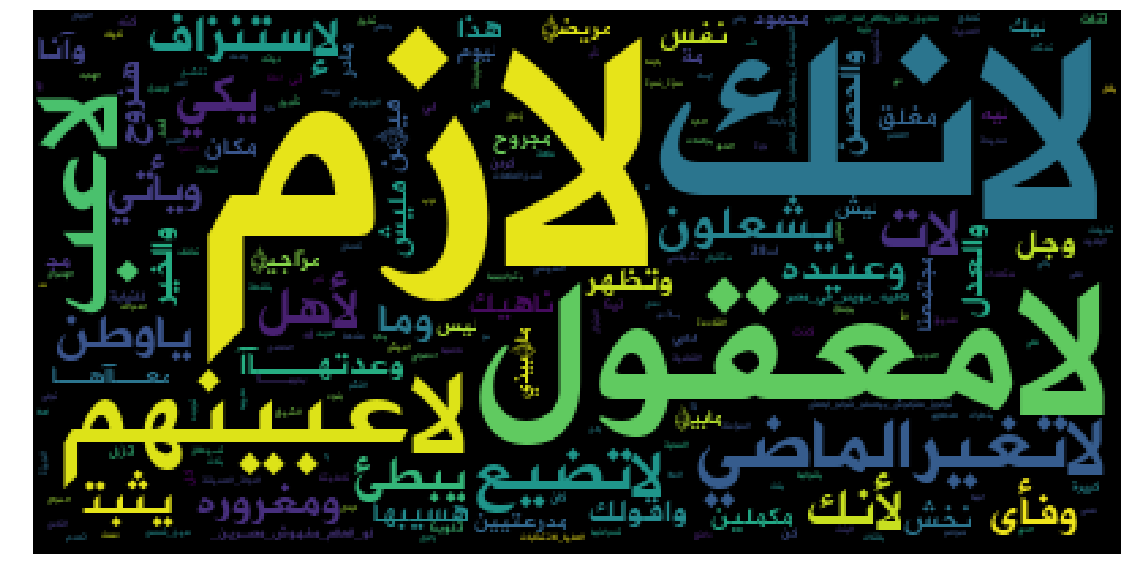

In [16]:
#Generating wordcloud. Relative scaling value is to adjust the importance of a frequency word.
#See documentation: https://github.com/amueller/word_cloud/blob/master/wordcloud/wordcloud.py
wordcloud = WordCloud(font_path="font_aljazeera.ttf").generate_from_frequencies(dict(entries))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
count = 0
for r in stop_words:
    print (r)
    if count > 10:
        break
    count+=1

حيثما
وإذ
ذواتا
على
بها
إذ
بنا
حاشا
لولا
ليس
ألا
لكي


In [18]:
filename = open("data/tweets.txt") 
outputfile = filename.readlines()
for line in outputfile:
    words = line.split() 
    for r in words: 
        if r in stop_words: 
            print(r)

** we did not use the code below because we did not see any word in the stop word list **

filename = open("data/tweets.txt") 

outputfile = filename.readlines()

for line in outputfile:
    
    words = line.split() 
    
    for r in words: 
        
        if not r in stop_words: 
            
            appendFile = open('data/ncleaned_tweets.txt','a') 
            
            appendFile.write("\t"+r) 
            
    appendFile.write("\n")
    
    appendFile.close()

OBJ        6675
NEG        1682
NEUTRAL     831
POS         798
Name: Classification, dtype: int64


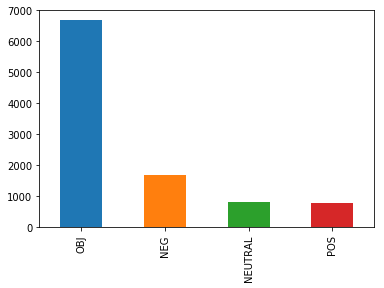

In [14]:
s2 = df.Classification
print(s2.value_counts())
# s2.value_counts().plot(kind='hist') 
s2.value_counts().plot( kind="bar") 
plt.show()

In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# y = np.random.rand(10,4)
# y[:,0]= np.arange(10)
# df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

# ax = df.plot(x="X", y="A", kind="bar")
# df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
# df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

# plt.show()

## 2. Preprocessing

### Step 3: Data PreProcessing ###

In [16]:
ara = AraTweet()

(Data,rating)=ara.read_clean_reviews()

In [17]:
len(rating)

10006

In [18]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

target_rating = le.fit_transform(rating)
# list(le.inverse_transform([0,1,2,3]))

In [19]:
target_rating.shape

(10006L,)

In [20]:
target_rating.data[10005]

'\x00'

In [21]:
le.classes_

array([u'NEG', u'NEUTRAL', u'OBJ', u'POS'], dtype='<U7')

In [22]:
target_rating

array([2, 3, 0, ..., 2, 3, 0], dtype=int64)

#### String Token Count(Bag of Words):

It takes each sentence (all the words) present in the data set in the review section and then splits each of the words present in the form of tokens. The occurrence of these tokens in the whole data set are counted in such a way that the count of the occurrence of each token in a positive and negative feedback (in balanced dataset) or positive, negative and neutral (in unbalanced dataset) are collected separately. Finally, the word frequency of the tokens is calculated.

code:  https://stackoverflow.com/questions/653887/equivalent-for-linkedhashmap-in-python

Ref: https://acadpubl.eu/hub/2018-119-12/articles/5/1211.pdf

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(Data)
X_train_counts.shape

(10006, 37555)

- Above ‘count_vect.fit_transform(twenty_train.data)’, create words/tokens dictionary. such that [n_samples, n_features].

#### Frequency–inverse document frequency(Tfidf):


It measures how important a word is to differentiate each category. It reduce the weightage of more common words like (stop words or common words) which occurs in all tweets. 

Code: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-5-50b4e87d9bdd 

Ref: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf 

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(10006, 37555)

#### Generating Balanced Data using resample from Sklearn

In [25]:
ASDA_data = []

for t, r in zip(Data,rating):
    ASDA_data.append([t,r])

ASDA_Crp = pd.DataFrame(ASDA_data, columns=['Tweets', 'rating'])

OBJ        6691
NEG        1684
NEUTRAL     832
POS         799
Name: rating, dtype: int64


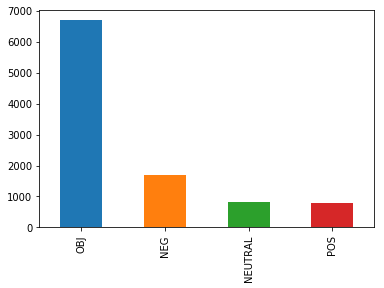

In [26]:
print(ASDA_Crp.rating.value_counts())
# s2.value_counts().plot(kind='hist') 
ASDA_Crp.rating.value_counts().plot( kind="bar") 
plt.show()

** 1- Downsampling - Balanced Data

SRC: https://elitedatascience.com/imbalanced-classes

In [27]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority_OBJ = ASDA_Crp[ASDA_Crp.rating=='OBJ']
df_majority_NEG = ASDA_Crp[ASDA_Crp.rating=='NEG']
df_majority_NEUTRAL = ASDA_Crp[ASDA_Crp.rating=='NEUTRAL']

df_minority_POS = ASDA_Crp[ASDA_Crp.rating=='POS']
 
# Downsample majority class
df_majority_OBJ_downsampled = resample(df_majority_OBJ, 
                                 replace=False,    # sample without replacement
                                 n_samples=799,     # to match minority class OBJ
                                 random_state=0) # reproducible results

df_majority_NEG_downsampled = resample(df_majority_NEG, 
                                 replace=False,    # sample without replacement 
                                 n_samples=799,     # to match minority class NEG
                                 random_state=0) # reproducible results

df_majority_NEUTRAL_downsampled = resample(df_majority_NEUTRAL, 
                                 replace=True,    # sample without replacement
                                 n_samples=799,     # to match minority class NATURAL
                                 random_state=0) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_OBJ_downsampled,df_majority_NEG_downsampled,df_majority_NEUTRAL_downsampled, df_minority_POS])
 
# Display new class counts
df_downsampled.rating.value_counts()

POS        799
OBJ        799
NEG        799
NEUTRAL    799
Name: rating, dtype: int64

In [28]:
df_downsampled.head()

,Tweets,rating
5075,شاهد - آخر كلام: طبيعة قنابل الغاز وكيفية مواج...,OBJ
5746,16 في 2008 امتنعت الدستورية الألمانية عن حل ال...,OBJ
4523,شاهد - بطل مصر والعالم رامي عاشور في آخر كلام #,OBJ
1205,وزير الصحة المكلف #عادل_فقيه ينفي #تأجيل_الدرا...,OBJ
3816,#اللهم اجعلني من أعظم خلقك نصيبا في كل خير تقس...,OBJ


POS        799
OBJ        799
NEG        799
NEUTRAL    799
Name: rating, dtype: int64


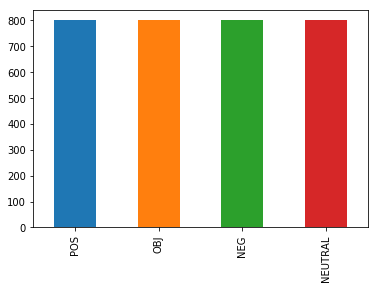

In [29]:
print(df_downsampled.rating.value_counts())
# s2.value_counts().plot(kind='hist') 
df_downsampled.rating.value_counts().plot( kind="bar") 
plt.show()

** 2- UpSampling - Balanced Data

In [30]:
# Separate majority and minority classes
df_majority_OBJ = ASDA_Crp[ASDA_Crp.rating=='OBJ']

df_minority_NEG = ASDA_Crp[ASDA_Crp.rating=='NEG']
df_minority_NEUTRAL = ASDA_Crp[ASDA_Crp.rating=='NEUTRAL']
df_minority_POS = ASDA_Crp[ASDA_Crp.rating=='POS']
 

# Upsample minority class
df_minority_NEG_upsampled = resample(df_minority_NEG, 
                                 replace=True,     # sample with replacement
                                 n_samples=6691,    # to match majority class
                                 random_state=0) # reproducible results
# Upsample minority class
df_minority_NEUTRAL_upsampled = resample(df_minority_NEUTRAL, 
                                 replace=True,     # sample with replacement
                                 n_samples=6691,    # to match majority class
                                 random_state=0) # reproducible results
# Upsample minority class
df_minority_POS_upsampled = resample(df_minority_POS, 
                                 replace=True,     # sample with replacement
                                 n_samples=6691,    # to match majority class
                                 random_state=0) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_OBJ, df_minority_POS_upsampled,df_minority_NEUTRAL_upsampled,df_minority_NEG_upsampled])
 
# Display new class counts
df_upsampled.rating.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

OBJ        6691
NEG        6691
NEUTRAL    6691
POS        6691
Name: rating, dtype: int64

In [31]:
df_upsampled.head()

,Tweets,rating
0,بعد استقالة رئيس #المحكمة_الدستورية ننتظر استق...,OBJ
3,#الحرية_والعدالة | شاهد الآن: #ليلة_الاتحادية ...,OBJ
7,أحكي لكم قصة حدثت بين شاب و أحد الفتيات كان بي...,OBJ
8,أدعوكم لحضور الندوة الثقافية الأربعاء مركز اعد...,OBJ
10,_ علاج السكري #اف_نتشورال #السعودية #العراق #ا...,OBJ


OBJ        6691
NEG        6691
NEUTRAL    6691
POS        6691
Name: rating, dtype: int64


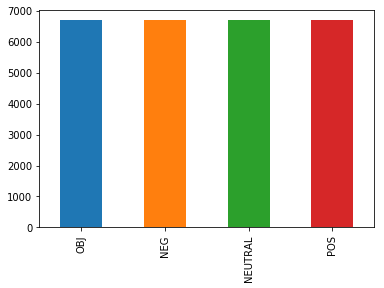

In [32]:
print(df_upsampled.rating.value_counts())
# s2.value_counts().plot(kind='hist') 
df_upsampled.rating.value_counts().plot( kind="bar") 
plt.show()

In [33]:
DataDistCollection = {'up_balanced': df_upsampled ,'down_balanced': df_downsampled , 'unBalanced': ASDA_Crp}

## 3. Prediction

### Step 4: Machine implementation using scikit-learn ###

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
models = [
    LogisticRegression(random_state=0),
    PassiveAggressiveClassifier(random_state=0),
    LinearSVC(tol=1e-3, random_state=0),
    Perceptron(tol=.2,random_state=0),
    BernoulliNB(binarize=0.5),
    SGDClassifier(loss="hinge", penalty="l2", random_state=0),
    KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeClassifier(),
    MultinomialNB()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, rating, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df.head()

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and defau

,model_name,fold_idx,accuracy
0,LogisticRegression,0,0.671992
1,LogisticRegression,1,0.676324
2,LogisticRegression,2,0.676662
3,LogisticRegression,3,0.674663
4,LogisticRegression,4,0.662331


In [35]:
cv_df[cv_df['accuracy'] > .68]

,model_name,fold_idx,accuracy
5,PassiveAggressiveClassifier,0,0.686970
7,PassiveAggressiveClassifier,2,0.680160
10,LinearSVC,0,0.702446
11,LinearSVC,1,0.687313
12,LinearSVC,2,0.697151
25,SGDClassifier,0,0.696955
26,SGDClassifier,1,0.691808
27,SGDClassifier,2,0.698651
28,SGDClassifier,3,0.682659


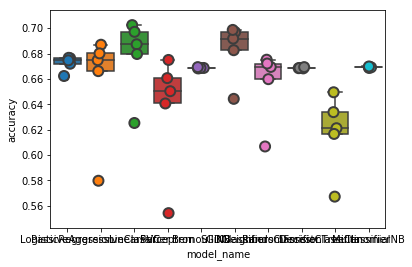

In [36]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=10, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

### Step 5: Fine tune the all the models ###  

In [37]:
#this function to retrive sentimental count in each class
def GetCount(array):
    df = pd.DataFrame(array,columns= ["Class"])
    counts = df.Class.value_counts()
    OBJ = counts['OBJ']
    NEG = counts['NEG']
    NEUTRAL = counts['NEUTRAL']
    POS = counts['POS']
    return [OBJ, NEG, NEUTRAL ,POS]

In [38]:
# Import train_test_split
from sklearn.cross_validation import train_test_split


gr = AraTweet()


classifiers_collection = {}
scores_collection = {}
dataframe_collection = {}
TweetCount_collection = {}

results = []

FeatuerDataSet = []
for key in DataDistCollection.keys():
    scores = list()
    # Split the 'features' and 'income' data into training and testing sets
    d_train, d_test, y_train, y_test = train_test_split(DataDistCollection[key].Tweets.values, 
                                                    DataDistCollection[key].rating.values, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

    # Show the results of the split
    # print("Training set has {} samples.".format(X_train.shape[0]))
    # print("Testing set has {} samples.".format(X_test.shape[0]))


    #---------------------------------------------------------------------------------
    TweetCount = [GetCount(y_train ), GetCount(y_test) ]
    df_tweetCount = pd.DataFrame(TweetCount,columns= ['OBJ', 'NEG', 'NEUTRAL' ,'POS']) 
    df_tweetCount['Dataset'] = ['Train Set','Test Set']
    df_tweetCount['name'] = key
    TweetCount_collection[key] = df_tweetCount
    #---------------------------------------------------------------------------------
    for feat_generator in Features_Generators:
            ####################################Features Generation#############################
    #         print("Features Generation:", feat_generator['name'])
            X_train = feat_generator['feat_generator'].fit_transform(d_train)
            X_test = feat_generator['feat_generator'].transform(d_test)


            for clf in classifiers:
                    print("\n------\n")
                    print("tuning: ", clf["name"] )


                    grid_fit = clf['tune_clf'].fit(X_train, y_train)
                    best_clf = grid_fit.best_estimator_
                    # Make predictions using the unoptimized and model
                    predictions = (clf["clf"].fit(X_train, y_train)).predict(X_test)
                    best_predictions = best_clf.predict(X_test)


                    # Report the before-and-afterscores
                    Clf_name = clf["name"] 

                    UnOpt_accuracy = accuracy_score(y_test, predictions)
                    UnOpt_fScore = f1_score(y_test, predictions,average='macro')
                    Opt_accuracy = accuracy_score(y_test, best_predictions)
                    Opt_fScore = f1_score(y_test, best_predictions,average='macro')


            #         clasifiers.append(Clf_name)

                    if (UnOpt_accuracy < Opt_accuracy ):
                        Best_Settings = grid_fit.best_params_
                        datarow = [Clf_name,key,feat_generator['name'],Best_Settings,UnOpt_accuracy , UnOpt_fScore , Opt_accuracy , Opt_fScore]
                        (acc, tacc, support, f1 , df) = Evaluate_Result(best_predictions, y_test)

                    else:
                        Best_Settings = clf["clf"].get_params()
                        datarow = [Clf_name,key,feat_generator['name'],Best_Settings,Opt_accuracy , Opt_fScore , UnOpt_accuracy , UnOpt_fScore]
                        (acc, tacc, support, f1 , df) = Evaluate_Result(predictions, y_test)
                        
                    print(Clf_name,'  ',key , '  ',feat_generator['name'],'  ',acc,'  ' , f1 )
                        
                    
                    results.append(datarow)


                    score = dict(data=key,
                                             feat_generator=feat_generator['name'],
                                             clf=clf['name'],
                                             # feat_ext=feat_ext['name'],
                                             f1=f1,
                                             acc=acc,
                                             tacc=tacc)

                    df['Classifier'] =  clf["name"]
                    df['feauter_generator'] = feat_generator['name']

                    df['acc'] = acc
                    df['f1']=f1

                    dataframe_collection[ key + '-' + clf["name"] + '-' + feat_generator['name'] ]  = df
    #                         print(clf["name"],df['feauter_generator'] )
                    scores.append(score)
        
    for key in dataframe_collection.keys():
        print("\n" +"="*40)
        print(key)
        print("-"*40)
        print(dataframe_collection[key])

        df_Classifiers = pd.DataFrame(classifiers)
        classifiers_collection[key] = df_Classifiers

    #     print("-"*40)
    #     print(df_Classifiers.head())

        df_s = pd.DataFrame(scores)
        scores_collection[key] = df_s
        
df_feauterCount = pd.DataFrame(FeatuerDataSet, columns=['DataSet_Name','Feauter_Generator','Feauters_Count'])


------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9476928824957968, '  ', 0.9460311382310792)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9504950495049505, '  ', 0.9495643592670353)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9495609938352326, '  ', 0.9480652338123381)

------

('tuning: ', 'Perceptron')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


('Perceptron', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9396600037362226, '  ', 0.938075938483711)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9144405006538389, '  ', 0.9125300415750257)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9469456379600225, '  ', 0.9458977231915217)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.8920231645806089, '  ', 0.8828056328813105)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9671212404259293, '  ', 0.9667529482192043)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9361105921912947, '  ', 0.9333070058566483)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'count_ng1', '  ', 0.9321875583784793, '  ', 0.9305382294974884)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9684289183635345, '  ', 0.9680112015557611)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9658135624883244, '  ', 0.9654806996766175)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9702970297029703, '  ', 0.9699750066076804)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9566598169250887, '  ', 0.9558823000784583)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9385391369325612, '  ', 0.9371741871249806)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.966000373622268, '  ', 0.9656384155897683)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balanc

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'count_ng2', '  ', 0.9508686717728376, '  ', 0.9496768698903629)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9732860078460677, '  ', 0.9730322971168059)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9704838408369139, '  ', 0.9702772251127545)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9745936857836727, '  ', 0.974372227441729)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9581543059966374, '  ', 0.9574736892875199)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9441434709508687, '  ', 0.9432021549191537)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9712310853726882, '  ', 0.9709843702780719)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balanc

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'count_ng3', '  ', 0.9501214272370633, '  ', 0.9488395823395681)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9433962264150944, '  ', 0.9413754800166283)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9491873715673453, '  ', 0.9478704871536785)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9377918923967868, '  ', 0.935444814920831)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9392863814683354, '  ', 0.937195692135768)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9144405006538389, '  ', 0.9125300415750257)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9082757332337008, '  ', 0.905036415715875)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balanced

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'tfidf_ng1', '  ', 0.9374182701288997, '  ', 0.9356830117179286)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9504950495049505, '  ', 0.9490340812770008)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9585279282645246, '  ', 0.9577140305397407)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9510554829067812, '  ', 0.9499182939804218)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9450775266205866, '  ', 0.9432885428448603)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9385391369325612, '  ', 0.9371741871249806)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9241546796189053, '  ', 0.9216663966928937)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balan

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'tfidf_ng2', '  ', 0.9508686717728376, '  ', 0.9496168415741487)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.950308238371007, '  ', 0.9487907722622206)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.9574070614608631, '  ', 0.9565994499403392)

------

('tuning: ', 'SVM')
('SVM', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.9497478049691762, '  ', 0.9485255005296482)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.9409676816738277, '  ', 0.938883020549546)

------

('tuning: ', 'bnb')
('bnb', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.9441434709508687, '  ', 0.9432021549191537)

------

('tuning: ', 'sgd')
('sgd', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.9260227909583411, '  ', 0.9236156113896932)

------

('tuning: ', 'KNN')
('KNN', '  ', 'up_balance

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'up_balanced', '  ', 'tfidf_ng3', '  ', 0.950681860638894, '  ', 0.949378281262015)

up_balanced-KNN-tfidf_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1346.0  242.0   30.0      NEG   0.847607  0.978198        KNN   
1  1341.0  146.0    5.0  NEUTRAL   0.901816  0.996285        KNN   
2   794.0   25.0  497.0      OBJ   0.969475  0.615027        KNN   
3  1327.0  132.0   13.0      POS   0.909527  0.990299        KNN   

  feauter_generator       acc        f1  
0         tfidf_ng3  0.898188  0.890376  
1         tfidf_ng3  0.898188  0.890376  
2         tfidf_ng3  0.898188  0.890376  
3         tfidf_ng3  0.898188  0.890376  

up_balanced-KNN-tfidf_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1349.0  233.0   27.0      NEG   0.852718  0.980378        KNN   
1  1341.0  134.0    5.0  NEUTRAL   0.909153  0.996285        KNN   
2   823.0  


up_balanced-SVM-count_ng2
----------------------------------------
       TP    FP     FN        L  Percision    Recall Classifier  \
0  1347.0  80.0   29.0      NEG   0.943938  0.978924        SVM   
1  1343.0  16.0    3.0  NEUTRAL   0.988227  0.997771        SVM   
2  1166.0  29.0  125.0      OBJ   0.975732  0.903176        SVM   
3  1338.0  34.0    2.0      POS   0.975219  0.998507        SVM   

  feauter_generator       acc        f1  
0         count_ng2  0.970297  0.969975  
1         count_ng2  0.970297  0.969975  
2         count_ng2  0.970297  0.969975  
3         count_ng2  0.970297  0.969975  

up_balanced-sgd-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1319.0  109.0   57.0      NEG   0.923669  0.958576        sgd   
1  1337.0   42.0    9.0  NEUTRAL   0.969543  0.993314        sgd   
2  1080.0   57.0  211.0      OBJ   0.949868  0.836561        sgd   
3  1333.0   76.0    7.0      POS   0.946061  0

       TP    FP     FN        L  Percision    Recall    Classifier  \
0  1338.0  78.0   38.0      NEG   0.944915  0.972384  RandomForest   
1  1344.0  11.0    2.0  NEUTRAL   0.991882  0.998514  RandomForest   
2  1158.0  43.0  133.0      OBJ   0.964197  0.896979  RandomForest   
3  1337.0  44.0    3.0      POS   0.968139  0.997761  RandomForest   

  feauter_generator       acc        f1  
0         count_ng1  0.967121  0.966753  
1         count_ng1  0.967121  0.966753  
2         count_ng1  0.967121  0.966753  
3         count_ng1  0.967121  0.966753  

up_balanced-sgd-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1285.0  165.0   91.0      NEG   0.886207  0.933866        sgd   
1  1326.0  110.0   20.0  NEUTRAL   0.923398  0.985141        sgd   
2   935.0   98.0  356.0      OBJ   0.905131  0.724245        sgd   
3  1316.0  118.0   24.0      POS   0.917713  0.982090        sgd   

  feauter_generator       acc 

       TP     FP     FN        L  Percision    Recall Classifier  \
0  1334.0   67.0   42.0      NEG   0.952177  0.969477        KNN   
1  1341.0   12.0    5.0  NEUTRAL   0.991131  0.996285        KNN   
2   718.0   17.0  573.0      OBJ   0.976871  0.556158        KNN   
3  1335.0  529.0    5.0      POS   0.716202  0.996269        KNN   

  feauter_generator       acc        f1  
0         count_ng3  0.883243  0.876372  
1         count_ng3  0.883243  0.876372  
2         count_ng3  0.883243  0.876372  
3         count_ng3  0.883243  0.876372  

up_balanced-KNN-count_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1337.0  132.0   39.0      NEG   0.910143  0.971657        KNN   
1  1341.0   40.0    5.0  NEUTRAL   0.971035  0.996285        KNN   
2   682.0   18.0  609.0      OBJ   0.974286  0.528273        KNN   
3  1332.0  471.0    8.0      POS   0.738769  0.994030        KNN   

  feauter_generator       acc        f1 


------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5453125000000001, '  ', 0.5427983460159725)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5140625000000001, '  ', 0.5136489932014796)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5453125, '  ', 0.5417768069611036)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5109375, '  ', 0.5087294249830752)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5671875000000001, '  ', 0.5638311427023273)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.5421875, '  ', 0.5427366518680319)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.36875, '  ', 0.34491640517690997)

------

('tuning: ', 'RandomForest')
('Random

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'count_ng1', '  ', 0.528125, '  ', 0.5256393043529576)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.5406249999999999, '  ', 0.5394885983581731)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.5234375, '  ', 0.5252084627577669)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.5484375, '  ', 0.5490992391202509)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.5390625, '  ', 0.5401424887664739)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.5671875, '  ', 0.566633322111049)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.53125, '  ', 0.5293285625558921)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.373437500

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'count_ng2', '  ', 0.515625, '  ', 0.5102010212192135)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.5359375, '  ', 0.5355988105203442)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.53125, '  ', 0.5337010157812704)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.546875, '  ', 0.54668328264831)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.515625, '  ', 0.512142377406241)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.5578125, '  ', 0.5559598983673527)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.528125, '  ', 0.5245703594905622)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.39375000000000004, '  '

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'count_ng3', '  ', 0.5109374999999999, '  ', 0.506034467784471)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.5328124999999999, '  ', 0.5302580042870181)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.5125, '  ', 0.5102632695193792)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.5421875, '  ', 0.5403784355953085)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.525, '  ', 0.5242399700946038)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.5671875000000001, '  ', 0.5638311427023273)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.5125, '  ', 0.5097047778389597)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'tfidf_ng1', '  ', 0.53125, '  ', 0.5273527427471008)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.5171875, '  ', 0.5139494077371166)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.525, '  ', 0.5230095966398576)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.5140625000000001, '  ', 0.5112121827854965)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.5187499999999999, '  ', 0.5162767156087141)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.5671875, '  ', 0.566633322111049)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.5296875, '  ', 0.5238786567253255)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.426

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'tfidf_ng2', '  ', 0.521875, '  ', 0.5156875880809251)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.50625, '  ', 0.5017646734417158)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.5140625, '  ', 0.511660934345059)

------

('tuning: ', 'SVM')
('SVM', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.5125, '  ', 0.5085870595709405)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.515625, '  ', 0.5120154488046262)

------

('tuning: ', 'bnb')
('bnb', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.5578125, '  ', 0.5559598983673527)

------

('tuning: ', 'sgd')
('sgd', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.5218750000000001, '  ', 0.5161272522704965)

------

('tuning: ', 'KNN')
('KNN', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.425, '  ', 0.

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'down_balanced', '  ', 'tfidf_ng3', '  ', 0.5265625, '  ', 0.5215628492921014)

up_balanced-Logistic Regression-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall           Classifier  \
0  1349.0  127.0   27.0      NEG   0.913957  0.980378  Logistic Regression   
1  1346.0   50.0    0.0  NEUTRAL   0.964183  1.000000  Logistic Regression   
2  1040.0   19.0  251.0      OBJ   0.982059  0.805577  Logistic Regression   
3  1338.0   84.0    2.0      POS   0.940928  0.998507  Logistic Regression   

  feauter_generator       acc        f1  
0         count_ng1  0.947693  0.946031  
1         count_ng1  0.947693  0.946031  
2         count_ng1  0.947693  0.946031  
3         count_ng1  0.947693  0.946031  

down_balanced-SVM-count_ng2
----------------------------------------
      TP     FP    FN        L  Percision    Recall Classifier  \
0   66.0   60.0  87.0      NEG   0.523810  0.431373        SVM   
1   94.0   34.0  52.

      TP    FP    FN        L  Percision    Recall Classifier  \
0   70.0  75.0  83.0      NEG   0.482759  0.457516        SVM   
1  100.0  81.0  46.0  NEUTRAL   0.552486  0.684932        SVM   
2   87.0  82.0  81.0      OBJ   0.514793  0.517857        SVM   
3   90.0  55.0  83.0      POS   0.620690  0.520231        SVM   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.542188  0.540378  
1         tfidf_ng1  0.542188  0.540378  
2         tfidf_ng1  0.542188  0.540378  
3         tfidf_ng1  0.542188  0.540378  

down_balanced-DecisionTree-count_ng2
----------------------------------------
     TP    FP     FN        L  Percision    Recall    Classifier  \
0  56.0  99.0   97.0      NEG   0.361290  0.366013  DecisionTree   
1  93.0  55.0   53.0  NEUTRAL   0.628378  0.636986  DecisionTree   
2  72.0  94.0   96.0      OBJ   0.433735  0.428571  DecisionTree   
3  73.0  98.0  100.0      POS   0.426901  0.421965  DecisionTree   

  feauter_generator       acc        f1  
0 

       TP     FP     FN        L  Percision    Recall Classifier  \
0  1284.0  128.0   92.0      NEG   0.909348  0.933140        bnb   
1  1300.0   73.0   46.0  NEUTRAL   0.946832  0.965825        bnb   
2   993.0  115.0  298.0      OBJ   0.896209  0.769171        bnb   
3  1318.0  142.0   22.0      POS   0.902740  0.983582        bnb   

  feauter_generator       acc       f1  
0         tfidf_ng1  0.914441  0.91253  
1         tfidf_ng1  0.914441  0.91253  
2         tfidf_ng1  0.914441  0.91253  
3         tfidf_ng1  0.914441  0.91253  

up_balanced-KNN-tfidf_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1346.0  242.0   30.0      NEG   0.847607  0.978198        KNN   
1  1341.0  146.0    5.0  NEUTRAL   0.901816  0.996285        KNN   
2   794.0   25.0  497.0      OBJ   0.969475  0.615027        KNN   
3  1327.0  132.0   13.0      POS   0.909527  0.990299        KNN   

  feauter_generator       acc        f1  
0  

       TP    FP     FN        L  Percision    Recall    Classifier  \
0  1337.0  79.0   39.0      NEG   0.944209  0.971657  RandomForest   
1  1344.0   6.0    2.0  NEUTRAL   0.995556  0.998514  RandomForest   
2  1185.0  43.0  106.0      OBJ   0.964984  0.917893  RandomForest   
3  1338.0  21.0    2.0      POS   0.984547  0.998507  RandomForest   

  feauter_generator       acc        f1  
0         count_ng2  0.972165  0.971991  
1         count_ng2  0.972165  0.971991  
2         count_ng2  0.972165  0.971991  
3         count_ng2  0.972165  0.971991  

up_balanced-RandomForest-count_ng1
----------------------------------------
       TP    FP     FN        L  Percision    Recall    Classifier  \
0  1338.0  78.0   38.0      NEG   0.944915  0.972384  RandomForest   
1  1344.0  11.0    2.0  NEUTRAL   0.991882  0.998514  RandomForest   
2  1158.0  43.0  133.0      OBJ   0.964197  0.896979  RandomForest   
3  1337.0  44.0    3.0      POS   0.968139  0.997761  RandomForest   

  feauter_g


down_balanced-KNN-tfidf_ng1
----------------------------------------
     TP     FP     FN        L  Percision    Recall Classifier  \
0  61.0   91.0   92.0      NEG   0.401316  0.398693        KNN   
1  70.0  103.0   76.0  NEUTRAL   0.404624  0.479452        KNN   
2  80.0  126.0   88.0      OBJ   0.388350  0.476190        KNN   
3  58.0   51.0  115.0      POS   0.532110  0.335260        KNN   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.420313  0.419234  
1         tfidf_ng1  0.420313  0.419234  
2         tfidf_ng1  0.420313  0.419234  
3         tfidf_ng1  0.420313  0.419234  

down_balanced-KNN-tfidf_ng2
----------------------------------------
     TP     FP     FN        L  Percision    Recall Classifier  \
0  54.0   87.0   99.0      NEG   0.382979  0.352941        KNN   
1  72.0  114.0   74.0  NEUTRAL   0.387097  0.493151        KNN   
2  74.0  109.0   94.0      OBJ   0.404372  0.440476        KNN   
3  73.0   57.0  100.0      POS   0.561538  0.421965    

       TP     FP     FN        L  Percision    Recall  Classifier  \
0  1344.0  130.0   32.0      NEG   0.911805  0.976744  Perceptron   
1  1343.0   63.0    3.0  NEUTRAL   0.955192  0.997771  Perceptron   
2  1032.0   23.0  259.0      OBJ   0.978199  0.799380  Perceptron   
3  1340.0   78.0    0.0      POS   0.944993  1.000000  Perceptron   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.945078  0.943289  
1         tfidf_ng2  0.945078  0.943289  
2         tfidf_ng2  0.945078  0.943289  
3         tfidf_ng2  0.945078  0.943289  

up_balanced-SVM-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1348.0  157.0   28.0      NEG   0.895681  0.979651        SVM   
1  1340.0   66.0    6.0  NEUTRAL   0.953058  0.995542        SVM   
2   995.0   23.0  296.0      OBJ   0.977407  0.770720        SVM   
3  1337.0   87.0    3.0      POS   0.938904  0.997761        SVM   

  feauter_generator       acc      

       TP     FP     FN        L  Percision    Recall           Classifier  \
0  1351.0  142.0   25.0      NEG   0.904889  0.981831  Logistic Regression   
1  1344.0   62.0    2.0  NEUTRAL   0.955903  0.998514  Logistic Regression   
2  1017.0   21.0  274.0      OBJ   0.979769  0.787761  Logistic Regression   
3  1338.0   78.0    2.0      POS   0.944915  0.998507  Logistic Regression   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.943396  0.941375  
1         tfidf_ng1  0.943396  0.941375  
2         tfidf_ng1  0.943396  0.941375  
3         tfidf_ng1  0.943396  0.941375  

up_balanced-sgd-tfidf_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1312.0  159.0   64.0      NEG   0.891910  0.953488        sgd   
1  1333.0   87.0   13.0  NEUTRAL   0.938732  0.990342        sgd   
2   984.0   66.0  307.0      OBJ   0.937143  0.762200        sgd   
3  1328.0   84.0   12.0      POS   0.940510  0.991045      

       TP     FP     FN        L  Percision    Recall Classifier  \
0  1309.0  158.0   67.0      NEG   0.892297  0.951308        sgd   
1  1333.0   83.0   13.0  NEUTRAL   0.941384  0.990342        sgd   
2   979.0   73.0  312.0      OBJ   0.930608  0.758327        sgd   
3  1326.0   92.0   14.0      POS   0.935120  0.989552        sgd   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.924155  0.921666  
1         tfidf_ng2  0.924155  0.921666  
2         tfidf_ng2  0.924155  0.921666  
3         tfidf_ng2  0.924155  0.921666  

down_balanced-RandomForest-count_ng2
----------------------------------------
      TP     FP     FN        L  Percision    Recall    Classifier  \
0   73.0   81.0   80.0      NEG   0.474026  0.477124  RandomForest   
1   85.0   17.0   61.0  NEUTRAL   0.833333  0.582192  RandomForest   
2   67.0   73.0  101.0      OBJ   0.478571  0.398810  RandomForest   
3  108.0  136.0   65.0      POS   0.442623  0.624277  RandomForest   

  feauter_generator

C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6893106893106894, '  ', 0.5861673587579227)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6988011988011988, '  ', 0.6466230109262107)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6728271728271729, '  ', 0.557020012965512)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6863136863136863, '  ', 0.5867018587977639)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6828171828171828, '  ', 0.5758861095955018)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'count_ng1', '  ', 0.6968031968031969, '  ', 0.6132010052304674)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6988011988011988, '  ', 0.6281752410205022)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6948051948051949, '  ', 0.6374408111803499)

------

('tuning: ', 'SVM')
('SVM', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.7017982017982018, '  ', 0.6319326991791357)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6818181818181818, '  ', 0.631851489905099)

------

('tuning: ', 'bnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6828171828171828, '  ', 0.5617653165719886)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6993006993006992, '  ', 0.6386468025313861)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6743256743256744, '  ', 0.5613266759611538)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6893106893106893, '  ', 0.583459143252706)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6838161838161839, '  ', 0.5779423776544824)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'count_ng2', '  ', 0.6968031968031969, '  ', 0.6048352981133429)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6983016983016984, '  ', 0.6197395792884808)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.7002997002997003, '  ', 0.632075686236989)

------

('tuning: ', 'SVM')
('SVM', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6993006993006994, '  ', 0.6289671372505239)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6758241758241759, '  ', 0.614497635286129)

------

('tuning: ', 'bnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6813186813186813, '  ', 0.5583079358781581)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6953046953046953, '  ', 0.6195488191159596)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6753246753246754, '  ', 0.557815086034711)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6933066933066934, '  ', 0.5970042360595411)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6833166833166834, '  ', 0.576919396941372)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'count_ng3', '  ', 0.6948051948051949, '  ', 0.5991389291390862)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6888111888111887, '  ', 0.5837319104438243)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6913086913086913, '  ', 0.647694443487341)

------

('tuning: ', 'SVM')
('SVM', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.695804195804196, '  ', 0.6225076533110131)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6463536463536464, '  ', 0.6204465264888106)

------

('tuning: ', 'bnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6893106893106894, '  ', 0.5861673587579227)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6968031968031968, '  ', 0.6330905697294446)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6848151848151849, '  ', 0.6033527391225705)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6903096903096904, '  ', 0.6010270960567048)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6868131868131868, '  ', 0.5828091935334179)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'tfidf_ng1', '  ', 0.6868131868131868, '  ', 0.5730039969070277)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6908091908091909, '  ', 0.6369089633699521)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6888111888111887, '  ', 0.6462650305514924)

------

('tuning: ', 'SVM')
('SVM', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6938061938061939, '  ', 0.6412603404562394)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6638361638361638, '  ', 0.6298645666259338)

------

('tuning: ', 'bnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6828171828171828, '  ', 0.5617653165719886)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6993006993006994, '  ', 0.6372834752553511)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6903096903096904, '  ', 0.6180255416339713)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6843156843156843, '  ', 0.5911397195658911)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6888111888111889, '  ', 0.5852722144683541)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'tfidf_ng2', '  ', 0.6863136863136863, '  ', 0.570289789492364)

------

('tuning: ', 'Logistic Regression')
('Logistic Regression', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6938061938061938, '  ', 0.6440368661257323)

------

('tuning: ', 'Passive Aggresive')
('Passive Aggresive', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6938061938061938, '  ', 0.6470118568427164)

------

('tuning: ', 'SVM')
('SVM', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6948051948051949, '  ', 0.635843646286995)

------

('tuning: ', 'Perceptron')
('Perceptron', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6608391608391608, '  ', 0.6316566481303154)

------

('tuning: ', 'bnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


('bnb', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6813186813186813, '  ', 0.5583079358781581)

------

('tuning: ', 'sgd')
('sgd', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.7002997002997002, '  ', 0.638822785141314)

------

('tuning: ', 'KNN')
('KNN', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6918081918081919, '  ', 0.619783137482347)

------

('tuning: ', 'RandomForest')
('RandomForest', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6893106893106894, '  ', 0.5845029842580834)

------

('tuning: ', 'DecisionTree')
('DecisionTree', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6843156843156843, '  ', 0.5767361670427615)

------

('tuning: ', 'mnb')


C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklearn\naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\rababalkhalifa\AppData\Local\conda\conda\envs\py27\lib\site-packages\sklear

('mnb', '  ', 'unBalanced', '  ', 'tfidf_ng3', '  ', 0.6858141858141857, '  ', 0.569403415812241)

up_balanced-Logistic Regression-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall           Classifier  \
0  1349.0  127.0   27.0      NEG   0.913957  0.980378  Logistic Regression   
1  1346.0   50.0    0.0  NEUTRAL   0.964183  1.000000  Logistic Regression   
2  1040.0   19.0  251.0      OBJ   0.982059  0.805577  Logistic Regression   
3  1338.0   84.0    2.0      POS   0.940928  0.998507  Logistic Regression   

  feauter_generator       acc        f1  
0         count_ng1  0.947693  0.946031  
1         count_ng1  0.947693  0.946031  
2         count_ng1  0.947693  0.946031  
3         count_ng1  0.947693  0.946031  

down_balanced-SVM-count_ng2
----------------------------------------
      TP     FP    FN        L  Percision    Recall Classifier  \
0   66.0   60.0  87.0      NEG   0.523810  0.431373        SVM   
1   94.0   34.0

3         count_ng1  0.695305  0.632653  

unBalanced-SVM-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0    71.0   76.0  245.0      NEG   0.482993  0.224684        SVM   
1    11.0   23.0  172.0  NEUTRAL   0.323529  0.060109        SVM   
2  1308.0  489.0   50.0      OBJ   0.727880  0.963181        SVM   
3    12.0   12.0  133.0      POS   0.500000  0.082759        SVM   

  feauter_generator     acc      f1  
0         count_ng1  0.7003  0.6304  
1         count_ng1  0.7003  0.6304  
2         count_ng1  0.7003  0.6304  
3         count_ng1  0.7003  0.6304  

down_balanced-sgd-tfidf_ng1
----------------------------------------
     TP    FP    FN        L  Percision    Recall Classifier  \
0  61.0  75.0  92.0      NEG   0.448529  0.398693        sgd   
1  95.0  83.0  51.0  NEUTRAL   0.533708  0.650685        sgd   
2  79.0  85.0  89.0      OBJ   0.481707  0.470238        sgd   
3  93.0  69.0  80.0      POS   0.5

     TP     FP     FN        L  Percision    Recall    Classifier  \
0  43.0   75.0  110.0      NEG   0.364407  0.281046  DecisionTree   
1  93.0   59.0   53.0  NEUTRAL   0.611842  0.636986  DecisionTree   
2  68.0   98.0  100.0      OBJ   0.409639  0.404762  DecisionTree   
3  89.0  115.0   84.0      POS   0.436275  0.514451  DecisionTree   

  feauter_generator       acc        f1  
0         count_ng3  0.457812  0.452765  
1         count_ng3  0.457812  0.452765  
2         count_ng3  0.457812  0.452765  
3         count_ng3  0.457812  0.452765  

down_balanced-DecisionTree-count_ng1
----------------------------------------
     TP     FP     FN        L  Percision    Recall    Classifier  \
0  53.0  102.0  100.0      NEG   0.341935  0.346405  DecisionTree   
1  95.0   63.0   51.0  NEUTRAL   0.601266  0.650685  DecisionTree   
2  69.0   88.0   99.0      OBJ   0.439490  0.410714  DecisionTree   
3  74.0   96.0   99.0      POS   0.435294  0.427746  DecisionTree   

  feauter_generator


up_balanced-KNN-tfidf_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1349.0  233.0   27.0      NEG   0.852718  0.980378        KNN   
1  1341.0  134.0    5.0  NEUTRAL   0.909153  0.996285        KNN   
2   823.0   23.0  468.0      OBJ   0.972813  0.637490        KNN   
3  1327.0  123.0   13.0      POS   0.915172  0.990299        KNN   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.904166  0.897402  
1         tfidf_ng2  0.904166  0.897402  
2         tfidf_ng2  0.904166  0.897402  
3         tfidf_ng2  0.904166  0.897402  

up_balanced-KNN-tfidf_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1350.0  231.0   26.0      NEG   0.853890  0.981105        KNN   
1  1341.0  105.0    5.0  NEUTRAL   0.927386  0.996285        KNN   
2   864.0   28.0  427.0      OBJ   0.968610  0.669249        KNN   
3  1327.0  107.0   13.0      POS   0.9253

       TP     FP     FN        L  Percision    Recall         Classifier  \
0  1348.0  137.0   28.0      NEG   0.907744  0.979651  Passive Aggresive   
1  1338.0   48.0    8.0  NEUTRAL   0.965368  0.994056  Passive Aggresive   
2  1058.0   25.0  233.0      OBJ   0.976916  0.819520  Passive Aggresive   
3  1337.0   62.0    3.0      POS   0.955683  0.997761  Passive Aggresive   

  feauter_generator       acc       f1  
0         tfidf_ng1  0.949187  0.94787  
1         tfidf_ng1  0.949187  0.94787  
2         tfidf_ng1  0.949187  0.94787  
3         tfidf_ng1  0.949187  0.94787  

up_balanced-mnb-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1325.0  137.0   51.0      NEG   0.906293  0.962936        mnb   
1  1321.0   81.0   25.0  NEUTRAL   0.942225  0.981426        mnb   
2  1026.0   68.0  265.0      OBJ   0.937843  0.794733        mnb   
3  1318.0   77.0   22.0      POS   0.944803  0.983582        mnb   

  fea


unBalanced-Passive Aggresive-tfidf_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall         Classifier  \
0   118.0  153.0  198.0      NEG   0.435424  0.373418  Passive Aggresive   
1    14.0   26.0  169.0  NEUTRAL   0.350000  0.076503  Passive Aggresive   
2  1225.0  408.0  133.0      OBJ   0.750153  0.902062  Passive Aggresive   
3    22.0   36.0  123.0      POS   0.379310  0.151724  Passive Aggresive   

  feauter_generator       acc        f1  
0         tfidf_ng2  0.688811  0.646265  
1         tfidf_ng2  0.688811  0.646265  
2         tfidf_ng2  0.688811  0.646265  
3         tfidf_ng2  0.688811  0.646265  

unBalanced-Passive Aggresive-tfidf_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall         Classifier  \
0   109.0  128.0  207.0      NEG   0.459916  0.344937  Passive Aggresive   
1    18.0   34.0  165.0  NEUTRAL   0.346154  0.098361  Passive Aggresive   
2  1245.0  426.0  1

       TP     FP     FN        L  Percision    Recall Classifier  \
0  1339.0  141.0   37.0      NEG   0.904730  0.973110        mnb   
1  1323.0   75.0   23.0  NEUTRAL   0.946352  0.982912        mnb   
2  1026.0   48.0  265.0      OBJ   0.955307  0.794733        mnb   
3  1330.0   71.0   10.0      POS   0.949322  0.992537        mnb   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.937418  0.935683  
1         tfidf_ng1  0.937418  0.935683  
2         tfidf_ng1  0.937418  0.935683  
3         tfidf_ng1  0.937418  0.935683  

down_balanced-mnb-count_ng3
----------------------------------------
      TP     FP    FN        L  Percision    Recall Classifier  \
0   59.0   65.0  94.0      NEG   0.475806  0.385621        mnb   
1  104.0  117.0  42.0  NEUTRAL   0.470588  0.712329        mnb   
2   85.0   79.0  83.0      OBJ   0.518293  0.505952        mnb   
3   79.0   52.0  94.0      POS   0.603053  0.456647        mnb   

  feauter_generator       acc        f1  
0     

     TP     FP     FN        L  Percision    Recall Classifier  \
0  61.0   91.0   92.0      NEG   0.401316  0.398693        KNN   
1  70.0  103.0   76.0  NEUTRAL   0.404624  0.479452        KNN   
2  80.0  126.0   88.0      OBJ   0.388350  0.476190        KNN   
3  58.0   51.0  115.0      POS   0.532110  0.335260        KNN   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.420313  0.419234  
1         tfidf_ng1  0.420313  0.419234  
2         tfidf_ng1  0.420313  0.419234  
3         tfidf_ng1  0.420313  0.419234  

down_balanced-KNN-tfidf_ng2
----------------------------------------
     TP     FP     FN        L  Percision    Recall Classifier  \
0  54.0   87.0   99.0      NEG   0.382979  0.352941        KNN   
1  72.0  114.0   74.0  NEUTRAL   0.387097  0.493151        KNN   
2  74.0  109.0   94.0      OBJ   0.404372  0.440476        KNN   
3  73.0   57.0  100.0      POS   0.561538  0.421965        KNN   

  feauter_generator       acc        f1  
0         tfidf_


unBalanced-RandomForest-count_ng1
----------------------------------------
       TP     FP     FN        L  Percision    Recall    Classifier  \
0    31.0   38.0  285.0      NEG   0.449275  0.098101  RandomForest   
1     3.0    5.0  180.0  NEUTRAL   0.375000  0.016393  RandomForest   
2  1334.0  582.0   24.0      OBJ   0.696242  0.982327  RandomForest   
3     6.0    3.0  139.0      POS   0.666667  0.041379  RandomForest   

  feauter_generator       acc        f1  
0         count_ng1  0.686314  0.586702  
1         count_ng1  0.686314  0.586702  
2         count_ng1  0.686314  0.586702  
3         count_ng1  0.686314  0.586702  

unBalanced-RandomForest-count_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall    Classifier  \
0    35.0   33.0  281.0      NEG   0.514706  0.110759  RandomForest   
1     8.0    2.0  175.0  NEUTRAL   0.800000  0.043716  RandomForest   
2  1339.0  576.0   19.0      OBJ   0.699217  0.986009  RandomForest  

       TP     FP     FN        L  Percision    Recall Classifier  \
0    86.0  104.0  230.0      NEG   0.452632  0.272152        sgd   
1    10.0   17.0  173.0  NEUTRAL   0.370370  0.054645        sgd   
2  1286.0  473.0   72.0      OBJ   0.731097  0.946981        sgd   
3    13.0   13.0  132.0      POS   0.500000  0.089655        sgd   

  feauter_generator       acc        f1  
0         tfidf_ng1  0.696803  0.633091  
1         tfidf_ng1  0.696803  0.633091  
2         tfidf_ng1  0.696803  0.633091  
3         tfidf_ng1  0.696803  0.633091  

unBalanced-sgd-tfidf_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0    91.0  114.0  225.0      NEG   0.443902  0.287975        sgd   
1    11.0   13.0  172.0  NEUTRAL   0.458333  0.060109        sgd   
2  1284.0  467.0   74.0      OBJ   0.733295  0.945508        sgd   
3    14.0    8.0  131.0      POS   0.636364  0.096552        sgd   

  feauter_generator       acc        f1  

       TP     FP     FN        L  Percision    Recall           Classifier  \
0  1353.0  128.0   23.0      NEG   0.913572  0.983285  Logistic Regression   
1  1346.0   69.0    0.0  NEUTRAL   0.951237  1.000000  Logistic Regression   
2  1050.0   17.0  241.0      OBJ   0.984067  0.813323  Logistic Regression   
3  1338.0   52.0    2.0      POS   0.962590  0.998507  Logistic Regression   

  feauter_generator       acc        f1  
0         tfidf_ng3  0.950308  0.948791  
1         tfidf_ng3  0.950308  0.948791  
2         tfidf_ng3  0.950308  0.948791  
3         tfidf_ng3  0.950308  0.948791  

up_balanced-Logistic Regression-tfidf_ng2
----------------------------------------
       TP     FP     FN        L  Percision    Recall           Classifier  \
0  1351.0  130.0   25.0      NEG   0.912221  0.981831  Logistic Regression   
1  1346.0   63.0    0.0  NEUTRAL   0.955287  1.000000  Logistic Regression   
2  1053.0   18.0  238.0      OBJ   0.983193  0.815647  Logistic Regression   
3  

      TP     FP    FN        L  Percision    Recall Classifier  \
0   62.0   65.0  91.0      NEG   0.488189  0.405229        mnb   
1  106.0  114.0  40.0  NEUTRAL   0.481818  0.726027        mnb   
2   86.0   81.0  82.0      OBJ   0.514970  0.511905        mnb   
3   76.0   50.0  97.0      POS   0.603175  0.439306        mnb   

  feauter_generator       acc        f1  
0         count_ng2  0.515625  0.510201  
1         count_ng2  0.515625  0.510201  
2         count_ng2  0.515625  0.510201  
3         count_ng2  0.515625  0.510201  

up_balanced-KNN-count_ng3
----------------------------------------
       TP     FP     FN        L  Percision    Recall Classifier  \
0  1334.0   67.0   42.0      NEG   0.952177  0.969477        KNN   
1  1341.0   12.0    5.0  NEUTRAL   0.991131  0.996285        KNN   
2   718.0   17.0  573.0      OBJ   0.976871  0.556158        KNN   
3  1335.0  529.0    5.0      POS   0.716202  0.996269        KNN   

  feauter_generator       acc        f1  
0       

## 4. Evaluation

### Step 6: Performance Measures for Classifieres ###  

In [41]:
df_resutlts = pd.DataFrame(results,columns=['clasifiers','Data','Feauter_Generator' ,'Best_Settings' , 'UnOpt_accuracys' , 'UnOpt_fScores' , 'Opt_accuracys' , 'Opt_fScores'])
# df_resutlts.index = df_resutlts.clasifiers.get_values()
df_resutlts.head()

,clasifiers,Data,Feauter_Generator,Best_Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
0,Logistic Regression,count_ng1,{u'C': 59.948425},0.941902,0.939496,0.947693,0.945434,NaN
1,Passive Aggresive,up_balanced,count_ng1,"{u'warm_start': False, u'loss': u'hinge', u'C'...",0.949561,0.948142,0.950495,0.949066
2,SVM,up_balanced,count_ng1,"{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.948440,0.946381,0.949561,0.947512
3,Perceptron,up_balanced,count_ng1,"{u'warm_start': False, u'n_iter': None, u'n_jo...",0.790958,0.782948,0.939660,0.937397
4,bnb,count_ng1,"{u'binarize': 0.0, u'alpha': 0.2, u'fit_prior'...",0.8881,0.884601,0.914441,0.911649,NaN


In [42]:
df_resutlts[df_resutlts['Opt_accuracys'] > .97]

,clasifiers,Data,Feauter_Generator,Best_Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
17,RandomForest,up_balanced,count_ng2,"{u'warm_start': False, u'oob_score': False, u'...",0.964880,0.964357,0.972165,0.971774
20,Logistic Regression,count_ng3,{u'C': 1291.54967},0.971044,0.970465,0.973286,0.972798,NaN
21,Passive Aggresive,count_ng3,"{u'warm_start': False, u'loss': u'hinge', u'C'...",0.970297,0.969850,0.970484,0.970042,NaN
22,SVM,up_balanced,count_ng3,"{u'loss': u'squared_hinge', u'C': 1.0, u'verbo...",0.973660,0.973239,0.974594,0.974148
25,sgd,count_ng3,"{u'warm_start': False, u'loss': u'hinge', u'n_...",0.969363,0.968903,0.971231,0.970753,NaN
27,RandomForest,up_balanced,count_ng3,"{u'warm_start': False, u'oob_score': False, u'...",0.964506,0.964174,0.971418,0.971117


In [47]:
subset = df_resutlts[df_resutlts['Opt_accuracys'] > .70]

d = subset[subset['Opt_fScores'] < .50]

d

,clasifiers,Data,Feauter_Generator,Best_Settings,UnOpt_accuracys,UnOpt_fScores,Opt_accuracys,Opt_fScores
141,Passive Aggresive,unBalanced,count_ng3,"{u'warm_start': False, u'loss': u'hinge', u'C'...",0.700300,0.351182,0.7003,0.351182
175,sgd,unBalanced,tfidf_ng3,"{u'warm_start': False, u'loss': u'hinge', u'n_...",0.695305,0.348231,0.7003,0.365919


[Text(0,0,'Logistic Regression'),
 Text(0,0,'Passive Aggresive'),
 Text(0,0,'SVM'),
 Text(0,0,'Perceptron'),
 Text(0,0,'bnb'),
 Text(0,0,'sgd'),
 Text(0,0,'KNN'),
 Text(0,0,'RandomForest'),
 Text(0,0,'DecisionTree'),
 Text(0,0,'mnb')]

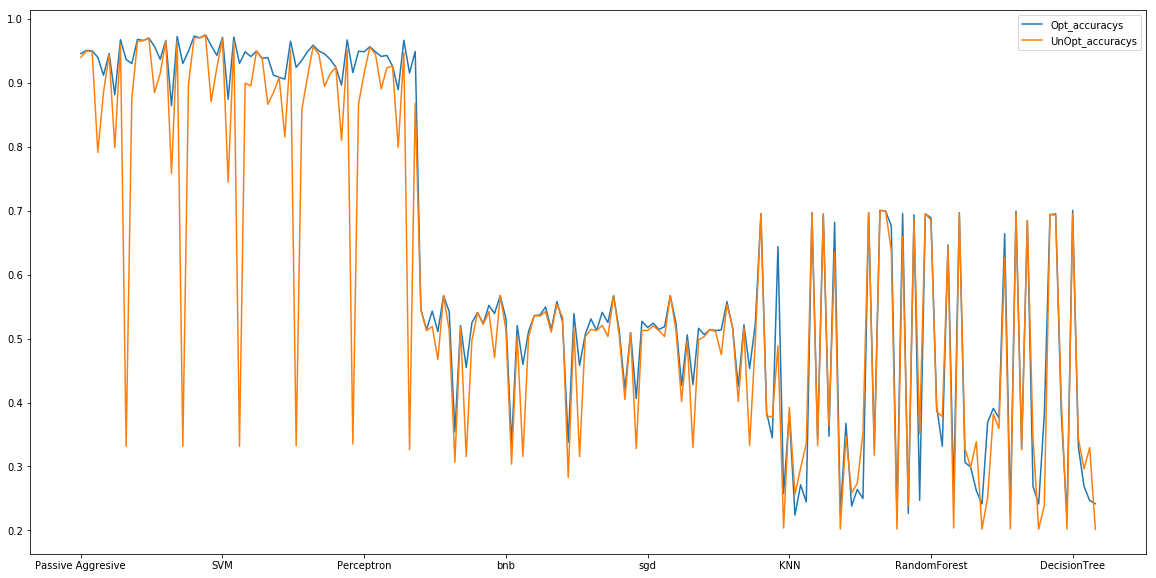

In [54]:

dataset = df_resutlts[['Opt_accuracys','UnOpt_accuracys']]
ax = dataset.plot(figsize=(20,10))
ax.set_xticklabels( df_resutlts.clasifiers.get_values())
# ax.set_xticks([1,2,3,4,5,6,7,8,9])

# ax.set_xlim([0, 10])
# ax.set_xlabel("Classifiers" )
# ax.set_ylabel("Accuracy")
# ax.set_title("Visualizing Results using Accuracy")